In [14]:
 
import timeit
import time
import numpy as np

def timing(f):
    def wrap(*args):
        time1 = time.time()
        ret = f(*args)
        time2 = time.time()
        print '%s function took %0.3f s' % (f.func_name, (time2-time1))
        return ret
    return wrap


In [42]:


print(moduloPowerOpt(9, 2, 23))

print (moduloPowerNaive(9,24,23))

moduloPowerOpt function took 0.000 s
12
moduloPowerNaive function took 0.000 s
12


In [ ]:
moduloPowerOpt(12412312, 1312312, 413158523)

In [17]:
#### Numpy version

@timing
def countMultisetPerm(x,y,z):
    n = x + y + z
    x_counts = np.zeros(n)
    y_counts = np.zeros(n)
    z_counts = np.zeros(n)

    multiset_perms_eff = np.zeros([x+1,y+1,z+1])
    multiset_perms_eff[0,0,0] = 1
    
    for i in range(x+1):
        for j in range(y+1):
             for k in range(z+1):
                    multiset_perms_eff[i][j][k] += multiset_perms_eff[i-1][j][k] if i > 0 else 0
                    multiset_perms_eff[i][j][k] += multiset_perms_eff[i][j-1][k] if j > 0 else 0
                    multiset_perms_eff[i][j][k] += multiset_perms_eff[i][j][k-1] if k > 0 else 0 
                    
#                     if i > 0: 
#                         for l in range(i + j + k ): 
#                             s = multiset_perms_eff[i-1][j][k]
#                             x_counts[l] += s
#                     if j > 0: 
#                         for l in range(i+j+k ): 
#                             y_counts[l] += multiset_perms_eff[i][j-1][k]
#                     if k > 0: 
#                         for l in range(i+j+k): 
#                             z_counts[l] += multiset_perms_eff[i][j][k-1]
                            
#     totals = [ 0 for t in range(n)]
#     for i in range(n):
#         totals[i] = 4*x_counts[i] + 5*y_counts[i] + 6*z_counts[i]
       
#     print totals
    
#     sum = 0
    
#     for i in range(n):
#         sum += totals[i]*10**i

#     print sum

countMultisetPerm(100,100,100)


countMultisetPerm function took 4.395 s


In [11]:
## Test for PSD matrix


from scipy.stats import bernoulli
from scipy import linalg
import numpy as np

P = 30
N = 10
np.random.seed(18) 
X = bernoulli.rvs(0.5, size=N*P).reshape((N, P))
X = 2 * X - 1* np.ones_like(X)
Q = np.dot(X.T, X)
def is_semi_pos_def(x):
    return np.all(np.linalg.eigvals(x) >= 0)
is_semi_pos_def(Q)


False

In [133]:
P = 5
N = 3
np.random.seed(18) 
X = bernoulli.rvs(0.5, size=N*P).reshape((N, P))
X = 2 * X - 1* np.ones_like(X)
Q = np.dot(X.T, X)
np.linalg.eigvalsh(Q)

array([ -1.10085498e-15,   1.21457890e-17,   2.33501314e-16,
         2.57557110e+00,   1.24244289e+01])

In [68]:
import sympy
from sympy.mpmath import mp
import numpy as np

P = 300
N = 100
X = bernoulli.rvs(0.5, size=N*P).reshape((N, P))
X = 2 * X - 1* np.ones_like(X)
M = mp.matrix(np.dot(X.T, X))
Q = np.dot(X.T, X)

print np.linalg.matrix_rank(Q)
print Q.shape

@timing
def is_semi_pos_def_chol(x):
    try:
        np.linalg.cholesky(x)
        return True
    except np.linalg.linalg.LinAlgError:
        return False

@timing
def is_semi_pos_def_eigsh(x, epsilon=1e-10):
    return np.all(np.linalg.eigvalsh(x) >= -epsilon)

@timing
def is_semi_pos_def_eigs(x, epsilon=1e-10):
    return np.all(np.linalg.eigvals(x) >= -epsilon)


@timing
def is_semi_pos_def_symbolic(x):
    try:
        sympy.mpmath.cholesky(x, tol=1)
        return True
    except ValueError as e:
        print e
        return False

print is_semi_pos_def_chol(Q)
print is_semi_pos_def_eigs(Q)
print is_semi_pos_def_eigsh(Q)
#print is_semi_pos_def_symbolic(M)

100
(300, 300)
is_semi_pos_def_chol function took 0.001 s
False
is_semi_pos_def_eigs function took 0.070 s
True
is_semi_pos_def_eigsh function took 0.013 s
True


In [77]:
from sympy import Matrix, S, Float

P = 30
N = 10
X = bernoulli.rvs(0.5, size=N*P).reshape((N, P))
X = 2 * X - 1* np.ones_like(X)
Q = np.dot(X.T, X)
M = Matrix(Q)
N = mp.matrix(Q)



@timing
def is_semi_pos_def_symbolic_old(x):
    try:
        x.cholesky()
        return True
    except ValueError as e:
        print e
        return False



print is_semi_pos_def_symbolic(N)
print is_semi_pos_def_chol(Q)
print is_semi_pos_def_eigsh(Q)

matrix is not positive-definite
is_semi_pos_def_symbolic function took 0.078 s
False
is_semi_pos_def_chol function took 0.000 s
False
is_semi_pos_def_eigsh function took 0.000 s
True


In [47]:
np.linalg.eigvalsh(Q)

array([ -1.08542624e-14,  -6.97066000e-15,  -5.90558945e-15,
        -4.78690892e-15,  -3.50740673e-15,  -3.18066075e-15,
        -1.84473359e-15,  -1.33283308e-15,  -1.10637118e-15,
        -9.97704464e-16,  -3.74878199e-16,   7.89334840e-18,
         6.26989612e-16,   1.17299458e-15,   1.95169295e-15,
         2.81880741e-15,   3.29822693e-15,   4.29153100e-15,
         6.18332599e-15,   8.63380232e-15,   8.84668911e+00,
         9.98813345e+00,   1.48234847e+01,   2.16274787e+01,
         2.65436294e+01,   3.04258708e+01,   3.45951609e+01,
         3.83958744e+01,   5.13386206e+01,   6.34150580e+01])

In [71]:
import sympy.mpmath 
A = Matrix(-eye(3) + hilbert(3))
is_semi_pos_def_symbolic_old(A)


Matrix must be square.
is_semi_pos_def_symbolic_old function took 0.000 s


False

In [76]:
A = Matrix(((-1,15,-5),(15,18,0),(0,0,0)))
is_semi_pos_def_symbolic_old(A)

Matrix must be symmetric.
is_semi_pos_def_symbolic_old function took 0.001 s


False

In [9]:
import IPython.html.nbextensions as nb
import IPython

In [4]:
from __future__ import print_function
from jupyter_core.paths import jupyter_config_dir, jupyter_config_path
print(jupyter_config_dir())
print(jupyter_config_path())

/Users/toru/.jupyter
['/Users/toru/.jupyter', '//anaconda/etc/jupyter', '/usr/local/etc/jupyter', '/etc/jupyter']


In [19]:
from IPython.core import extensions
E = extensions.ExtensionManager(shell=get_ipython())
print (E.ipython_extension_dir)

/Users/toru/.ipython/extensions


In [15]:
E.

In [21]:
%load_ext tikzmagic

The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


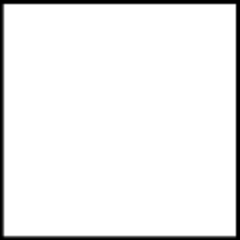

In [22]:
%tikz \draw (0,0) rectangle (1,1);
